<a href="https://colab.research.google.com/github/fyng/ScrabbleReferee/blob/main/arthur_cf_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf

SEED = 1

In [3]:
df = pd.read_csv("94_character_TMNIST.csv", nrows=250000)
#df = df[df['labels'].str.contains('[A-Z]')]
df = df[df['labels'].str.isupper()]
df = df[df['names'].str.contains('sans', case=False)]

In [4]:
le=LabelEncoder()
df = df.assign(labels = le.fit_transform(df['labels']))

In [5]:
np.shape(df.iloc[:,2:].values)

(18, 784)

In [6]:
# labels to predict
y = df.labels.values
# normalize features
#X = df.iloc[:,2:].values/255
# binarize image
#X = np.array([1 if val > 127 else 0 for val in df.iloc[:,2:].values])
X = (df.iloc[:,2:].values > 40).astype(int)
X = X.reshape(-1, 28, 28, 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)
#X_train, X_test, y_train, y_test = torch.from_numpy(X_train), torch.from_numpy(X_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [8]:
plt.imshow(X[4000])
plt.axis("off")
plt.title(str(le.inverse_transform([y[4000]])))
plt.show()

IndexError: ignored

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [10]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the images to (28, 28, 1)
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
print(X_train.shape)

# Convert the labels to one-hot encoded vectors
y_train = tf.one_hot(y_train, 26)
y_test = tf.one_hot(y_test, 26)
print(y_train.shape)

(14, 28, 28, 1)
(14, 26)


In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 3.2579 - accuracy: 0.0000e+00 - val_loss: 3.2571 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 83ms/step - loss: 3.2552 - accuracy: 0.0909 - val_loss: 3.2580 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 62ms/step - loss: 3.2509 - accuracy: 0.0909 - val_loss: 3.2597 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 76ms/step - loss: 3.2450 - accuracy: 0.0909 - val_loss: 3.2621 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 77ms/step - loss: 3.2369 - accuracy: 0.0909 - val_loss: 3.2661 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 81ms/step - loss: 3.2260 - accuracy: 0.0909 - val_loss: 3.2712 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 65ms/step - loss: 3.2118 - accuracy: 0.0909 - val_loss: 3.2783 - val_accuracy: 0.0000e+

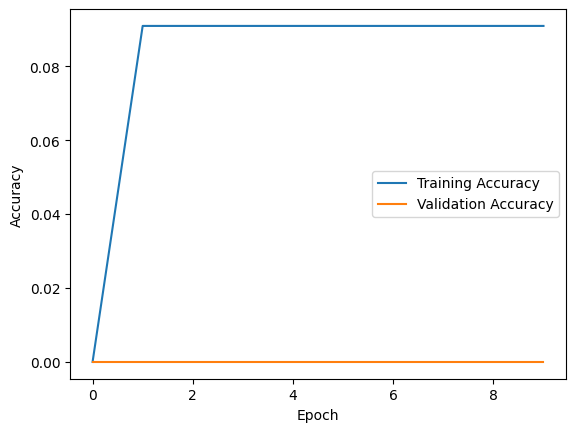

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test set loss: {loss:.4f}')
print(f'Test set accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 38ms/step - loss: 3.2823 - accuracy: 0.0000e+00
Test set loss: 3.2823
Test set accuracy: 0.0000


In [16]:
# Load and preprocess the image
img = cv2.imread('letter_H.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
#binarize
_, binar = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


img = np.expand_dims(binar, axis=-1)
img = img / 255.0

# Get the predicted class probabilities
probs = model.predict(np.array([img]))

# Get the index of the class with the highest probability
pred_idx = np.argmax(probs)

# Map the index to the corresponding letter label
#label = [k for k, v in train_generator.class_indices.items() if v == pred_idx][0]

print("Predicted letter: ")
print(chr(ord('A')+pred_idx))

1/1 [==============================] - 0s 125ms/step
Predicted letter: 
H


In [ ]:
cv2.imshow('Binarized Image', binar)
cv2.waitKey(0)
cv2.destroyAllWindows()

feiyang stuff


In [28]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
from google.colab.patches import cv2_imshow

In [32]:
def find_grid(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    tiles = []
    for c in contours:
        area = cv2.contourArea(c)
        if area > 1000 and area < 5000:
            #calculate accuracy as a percent of contour perimeter
            tiles.append(c)
            accuracy=0.03*cv2.arcLength(c,True)
            approx=cv2.approxPolyDP(c,accuracy,True)
            #cv2.drawContours(image,[approx],0,(0,255,0),2)
            #cv2.imshow('Approx polyDP', image)

    # cv2.imshow("Final Image", image)
    cv2_imshow(image)
    plt.imshow(image)
    return tiles

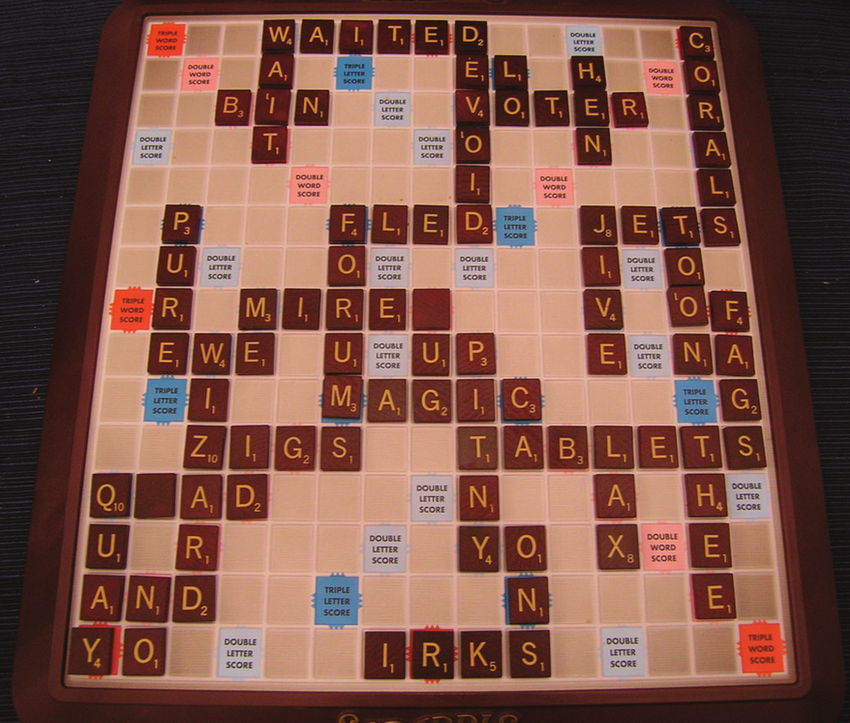

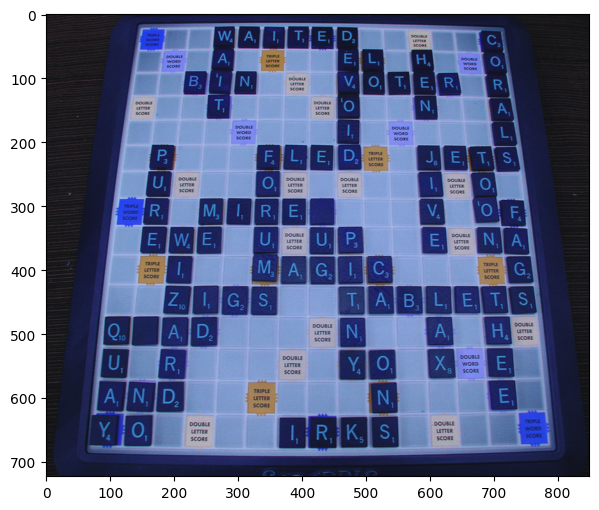

In [33]:
test_path = 'data/board2.png'
test_img = cv2.imread(test_path)

g = find_grid(test_img)

In [238]:
print(bin.dtype)

bool


In [ ]:
# Arthur Corner Detection
test_path = 'data/board2.png'
img = cv2.imread(test_path)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# plt.imshow(gray)
bin = gray >= 60
plt.imshow(bin)
# rgb_bin = cv2.cvtColor(bin, cv2.COLOR_GRAY2RGB)
# plt.imshow(rgb_bin)

# orb = cv2.ORB_create()
# kps1, des1 = orb.detectAndCompute(rgb_bin,None)
##Version 1
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# plt.imshow(gray)
# bin = gray >= 60
# plt.imshow(bin)
# # detect corners with the goodFeaturesToTrack function.
# corners = cv2.goodFeaturesToTrack(bin, 27, 0.01, 10)
# corners = np.int0(corners)
  
# # we iterate through each corner, 
# # making a circle at each point that we think is a corner.
# for i in corners:
#     x, y = i.ravel()
#     cv2.circle(img, (x, y), 3, 255, -1)
  
# plt.imshow(img), plt.show()

##Version 2

# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# plt.imshow(gray)
# bin = gray >= 60
# plt.imshow(bin)

# dst = cv2.cornerHarris(bin,2,3,0.04)
# #result is dilated for marking the corners, not important
# dst = cv2.dilate(dst,None)
# # Threshold for an optimal value, it may vary depending on the image.
# img[dst>0.01*dst.max()]=[0,0,255]
# cv2_imshow(img)
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()

In [166]:
# Old Contour

import math
def crop_contour(contours, img):
    img_arr = []
    rows = math.ceil(len(g)/6)
    num = 0
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        ROI = img[y:y+h, x:x+w]
        if abs(h-w) > (h+w)/4 :
          img_arr.append(ROI)
          plt.subplot(rows,6,num+1)
          plt.axis('off')
          plt.imshow(ROI)
          num += 1
    return img_arr


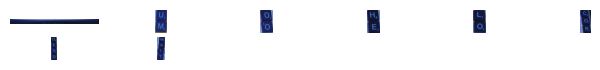

In [167]:
rgb_images = crop_contour(g, test_img)

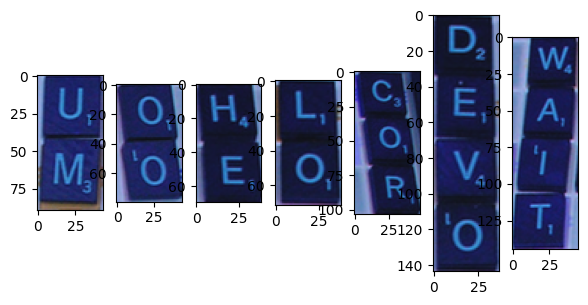

In [251]:
j = len(rgb_images)
for i in  range(j-1):
  plt.subplot(1,8,i+1)
  plt.imshow(rgb_images[i+1])

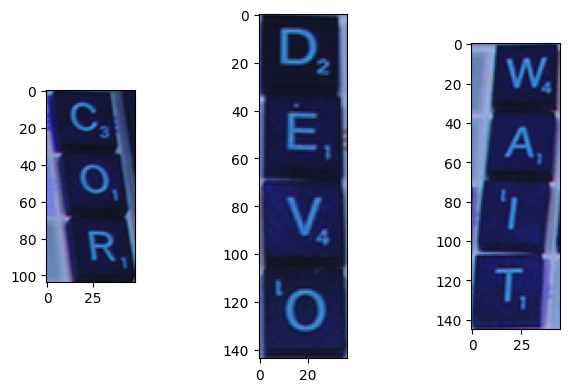

In [249]:
plt.subplot(1,6,1)
plt.imshow(rgb_images[5])
plt.subplot(1,6,3)
plt.imshow(rgb_images[6])
plt.subplot(1,6,5)
plt.imshow(rgb_images[7])

In [246]:
# New Contour

import math
def crop_contour1(contours, img):
    img_arr = []
    rows = math.ceil(len(g)/6)
    num = 0
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        ROI = img[y:y+h, x:x+w]
        if abs(h-w) > (h+w)/4:
          if h > w:
            n = round(h/w)
            h = round(h/n)
            for i in range(n):
              ROI = img[y:y+h, x:x+w]
              img_arr.append(ROI)
              plt.subplot(rows,6,num+1)
              plt.axis('off')
              plt.imshow(ROI)
              num += 1
              y = y+h
          # else:
          #   n = round(w/h)
          #   w = round(w/n)
          #   for i in range(n):
          #     ROI = img[y:y+h, x:x+w]
          #     img_arr.append(ROI)
          #     plt.subplot(rows,6,num+1)
          #     plt.axis('off')
          #     plt.imshow(ROI)
          #     num += 1
          #     x = x+w

            # img_arr.append(ROI)
            # plt.subplot(rows,6,num+1)
            # plt.axis('off')
            # plt.imshow(ROI)
            # num += 1
    return img_arr


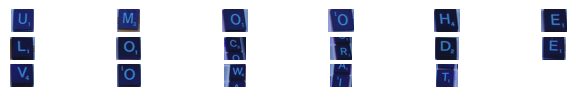

In [178]:
rgb_images1 = crop_contour1(g, test_img)

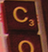

In [248]:
cv2_imshow(rgb_images1[8])

In [72]:
imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in rgb_images]
imgs = [cv2.resize(img, (28, 28)) for img in imgs]
true_labels = ['.','I','K','S','O','R','Y','N','D','N','A','E','.','.','Y','O','X','R','U','E','N','A','D','A','H','-','-','Q','S','T','E','B','A','T','S','G','L','I','Z','G','G','I','A','C','I','.','.','A','U','N','E','P','=','E','W','E','F','V','E','R','-','-','I','M','R','=','I','O','U','S','T','E','J','.','.','D','E','L','F','P','L','I','A','N','R','T','N','B','=','=','=','=','E','I','T','A','=']

# Define threshold value
thresh_value = 80

with open("output.txt", "w") as f:
    print("", file = f)

# Iterate over list of grayscale images
for i in range(len(imgs)):
    # Apply thresholding to binarize the image
    _, bin_image = cv2.threshold(imgs[i], thresh_value, 1, cv2.THRESH_BINARY)
    kernel = np.ones((2,2), np.uint8)
    eroded = cv2.erode(bin_image, kernel, iterations=1)
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(eroded, kernel, iterations=1)
    
    # Replace original image with binarized image in list
    imgs[i] = bin_image

#print("greyscale", imgs[2])
with open("output.txt", "w") as f:
    for i in range(len(imgs)):
        print(imgs[i], file=f)
#imgs = np.array([int(np.expand_dims(img, axis=-1) < 127) for img in imgs])
imgs = np.array([np.expand_dims(img, axis=-1) for img in imgs])


# Get the predicted class probabilities for all the images
probs = model.predict(imgs)

# Get the indices of the classes with the highest probability for all the images
pred_indices = np.argmax(probs, axis=1)

# Map the indices to the corresponding letter labels
labels = [chr(ord('A')+i) for i in pred_indices]

print("Predicted letters: ")
print(labels)
print(true_labels)
print(sum((np.array(true_labels)==np.array(labels)))/len(true_labels))

3/3 [==============================] - 0s 16ms/step
Predicted letters: 
['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
['.', 'I', 'K', 'S', 'O', 'R', 'Y', 'N', 'D', 'N', 'A', 'E', '.', '.', 'Y', 'O', 'X', 'R', 'U', 'E', 'N', 'A', 'D', 'A', 'H', '-', '-', 'Q', 'S', 'T', 'E', 'B', 'A', 'T', 'S', 'G', 'L', 'I', 'Z', 'G', 'G', 'I', 'A', 'C', 'I', '.', '.', 'A', 'U', 'N', 'E', 'P', '=', 'E', 'W', 'E', 'F', 'V', 'E', 'R', '-', '-', 'I', 'M', 'R', '=', 'I', 'O', 'U', 'S', 'T', 'E', 'J', '.', '.', 'D', 'E', 'L', 'F', 'P', 'L', 'I', 'A', 'N', 'R', 'T', 'N', 'B', '=', '=', '=', '=', 'E', 'I', 'T', 'A', '

ValueError: ignored

In [ ]:
img = cv2.resize(img, (28, 28))
img = np.expand_dims(img, axis=-1)
img = img / 255.0

# Get the predicted class probabilities
probs = model.predict(np.array([img]))

# Get the index of the class with the highest probability
pred_idx = np.argmax(probs)

# Map the index to the corresponding letter label
#label = [k for k, v in train_generator.class_indices.items() if v == pred_idx][0]

print("Predicted letter: ")
print(chr(ord('A')+pred_idx))

1/1 [==============================] - 0s 53ms/step
Predicted letter: 
J


trash 

In [ ]:
from keras.datasets import mnist
(x_train_m, y_train_m_start), (x_test_m, y_test_m_start) = mnist.load_data()
x_train_m[0].shape
X_train_m = x_train_m.astype('float32') / 255.0
X_test_m = x_test_m.astype('float32') / 255.0

# Reshape the images to (28, 28, 1)
X_train_m = np.reshape(X_train_m, (len(X_train_m), 28, 28, 1))
X_test_m = np.reshape(X_test_m, (len(X_test_m), 28, 28, 1))
print(X_train_m.shape)

# Convert the labels to one-hot encoded vectors
y_train_m = to_categorical(y_train_m_start, 26)
y_test_m = to_categorical(y_test_m_start, 26)
print(y_train_m.shape)

(60000, 28, 28, 1)
(60000, 26)


In [ ]:

from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn.metrics import roc_auc_score, accuracy_score
'''
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))



'''
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(94, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten_5 (Flatten)         (None, 1600)             

ValueError: in user code:

    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 94) are incompatible


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test set loss: {loss:.4f}')
print(f'Test set accuracy: {accuracy:.4f}')

52/52 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0352
Test set loss: 0.0000
Test set accuracy: 0.0352


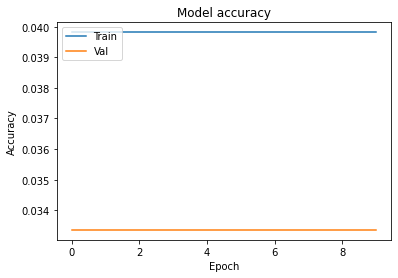

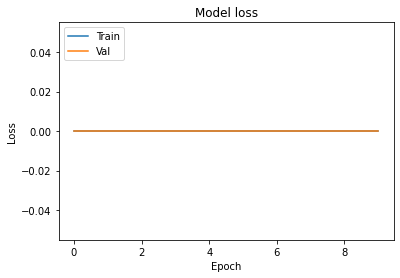

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

test other